# Salary predictor

**Origem do dataset**: https://www.kaggle.com/datasets/johnolafenwa/us-census-data/versions/1?resource=download

**Desafio**: Predizer o salário anual (se maior ou menor que 50k) baseado nos dados coletados do censo demográfico de 1994 nos Estados Unidos.

**Cenário do desafio** : Uma multinacional quer estudar o plano de carreira e de salário (anual) dos seus colaboradores e futuros contratados. Sabe-se que o valor salarial tem uma correlação diretamente proporcional ao nível escolar, hard skills e atualmente conta também com a soft skills.

**Objetivo do projeto** : Contratar os melhores candidatos e reestruturar o plano de carreira da empresa,com auxílio do modelo de inteligência artificial, no prazo de seis meses para que possa realizar projetos em escala mundial.


## Hipóteses

1. Pessoas brancas recebem mais educação. Logo, recebem maiores salários.
2. A correlação salarial é diretamente proporcional ao grau de instrução.
3. Os servidores públicos recebem mais que os empregados privados
4. Homens estudam mais, logo ganham mais.
5. Pessoas domiciliadas em países de primeiro mundo tendem a receber mais e são empreendedores.
6. Os solteiros tendem a ganhar menos, pois não atingiram a maturidade profissional
7. O auge da carreira tem correlação positiva com a idade

### Validando hipóteses:
1. No geral, as pessoas brancas recebem mais. E foi validado que quanto mais se estudou, as pessoas brancas atingiram um níviel salarial maior.
2. **Não**. No nosso estudo, o valor salarial depende muito do cargo que se exerce.
3. Os empregados **privados** ganham mais que os servidores públicos
4. Na nossa amostra, temos mais homens que mulheres. Precisaríamos de mais dados referente às mulheres para responder a esta pergunta.
5. Temos mais dados americanos, esta pergunta pode enviesar o trabalho.
6. Depende muito do conceito de maturidade profissional. Nos dados, temos o exemplo da Amanda que com 19 anos tem um rendimento anual superior a 50k.
7. Os mais velhos atingiram o cargos de alta gerência. Talvez poderíamos afirmar esta hipótese.

## Conhecendo os dados

Nesta etapa, vamos carregar os dois datasets disponibilizados pela Kaggle (trainining e test) e juntar os dois para termos mais base de dados a serem analisados e melhorar a qualidade dos insights gerados pelos estudos.

In [1]:
#importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## carregando os dados semitratados

In [2]:
#carregando os dados semitratados
df_f= pd.read_csv('salary_f.csv')
df_f.head(3)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Conhecendo os dados

Sendo uma multinacional, vamos verificar quais profissoões contém o dataset:

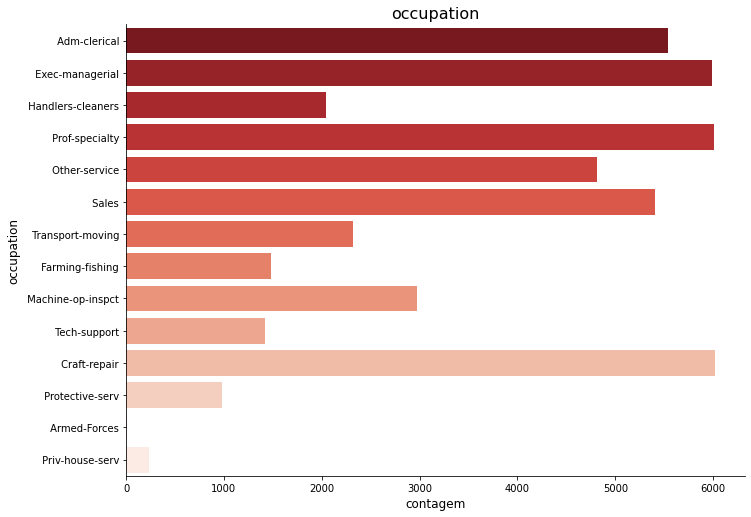

In [3]:
occupation = sns.catplot(y="occupation", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
occupation.ax.set_title("occupation",fontdict={'size':16})
occupation.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
occupation.ax.yaxis.set_label_text("occupation",fontdict= {'size':12})
plt.show()

Vamos retirar as infomações dos cargos de prof_specialty, other-service, craft-repair, \
farming-fishing, armed-forced, priv-house-serv por não caracterizar como cargos da multinacional.

In [4]:
remove_occup= df_f.loc[(df_f['occupation']==' Prof-specialty') |
                      (df_f['occupation']==' Other-service') |
                      (df_f['occupation']== ' Craft-repair') |
                      (df_f['occupation']== ' Farming-fishing')|
                      (df_f['occupation']== ' Armed-Forces') |
                      (df_f['occupation']==' Priv-house-serv')].index

df_f = df_f.drop(remove_occup)
df_f.occupation.value_counts()

 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Tech-support         1420
 Protective-serv       976
Name: occupation, dtype: int64

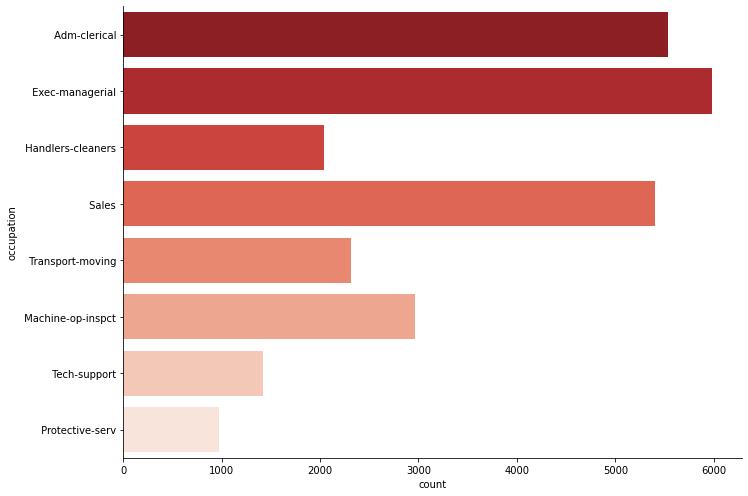

In [5]:
#Plotando o mesmo gráfico para verificação
occupation = sns.catplot(y="occupation", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)

Da mesma forma como a occupação, vamos retirar do dataset, a classe governamental (state-gov, Federal-gov)

In [6]:
df_f.work_class.value_counts()

 Private             20469
 Self-emp-not-inc     1523
 Local-gov            1510
 Self-emp-inc         1122
 State-gov            1028
 Federal-gov           998
 Without-pay            10
Name: work_class, dtype: int64

In [7]:
remove_work_class= df_f.loc[(df_f['work_class']==' Local-gov') |
                        (df_f['work_class']==' State-gov') |
                      (df_f['work_class']==' Federal-gov')].index



df_f = df_f.drop(remove_work_class)
df_f.work_class.value_counts()

 Private             20469
 Self-emp-not-inc     1523
 Self-emp-inc         1122
 Without-pay            10
Name: work_class, dtype: int64

Verificando a coluna estado civil:

In [8]:
df_f.marital_status.value_counts()

#Vamos agrupar os dados para casado, solteiro, divorciado e viúvo

 Married-civ-spouse       10525
 Never-married             7698
 Divorced                  3322
 Separated                  693
 Widowed                    616
 Married-spouse-absent      256
 Married-AF-spouse           14
Name: marital_status, dtype: int64

In [9]:
df_f.replace(' Married-civ-spouse', ' Married', inplace=True)
df_f.replace(' Married-AF-spouse', ' Married', inplace=True)
df_f.replace(' Married-spouse-absent', ' Married', inplace=True)
df_f.replace(' Never-married', ' Single', inplace=True)
df_f.replace(' Separated', ' Divorced', inplace=True)

df_f.marital_status.value_counts()

 Married     10795
 Single       7698
 Divorced     4015
 Widowed       616
Name: marital_status, dtype: int64

Vamos transformar as colunas capital gain e capital loss para sim e não, representando ganho de capital ou perda.

In [10]:
#capital gain  e capital loss
df_f['capital_gain'] = df_f['capital_gain'].apply(lambda x: "yes" if x>0 else "no")
df_f['capital_loss'] = df_f['capital_loss'].apply(lambda x: "yes" if x>0 else "no")
df_f.sample(3)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
4752,42,Self-emp-not-inc,99185,Some-college,10,Married,Exec-managerial,Husband,White,Male,no,no,40,United-States,>50K
583,30,Private,103649,Bachelors,13,Married,Adm-clerical,Wife,Black,Female,no,no,40,United-States,>50K
10152,21,Private,170800,HS-grad,9,Single,Sales,Own-child,White,Female,no,no,30,United-States,<=50K


**Explorando a coluna país de origem**
- Vamos agrupar os países em continentes

In [11]:
df_f.native_country.unique()

array([' United-States', ' Mexico', ' Puerto-Rico', ' England',
       ' Germany', ' Philippines', ' Poland', ' Columbia', ' Iran',
       ' Thailand', ' Laos', ' Taiwan', ' Haiti', ' Dominican-Republic',
       ' El-Salvador', ' Cuba', ' China', ' India', ' Canada', ' Jamaica',
       ' Italy', ' Japan', ' Peru', ' Scotland', ' Trinadad&Tobago',
       ' South', ' Guatemala', ' Vietnam', ' Hong', ' Nicaragua',
       ' Greece', ' Portugal', ' France', ' Ireland', ' Ecuador',
       ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' Honduras',
       ' Hungary', ' Cambodia', ' Holand-Netherlands'], dtype=object)

In [12]:
#Separando em continentes
#Country Groupings
Asia = [" Laos", " Thailand", " Taiwan", " Vietnam", " Japan", " Cambodia", " China", " India", " Philippines", " Hong", " Iran"]
Europa = [" Hungary", " Yugoslavia", " France", " Scotland", " Ireland", " Greece", " Poland", " Portugal", " Italy", " England",
         " Germany", " Holand-Netherlands"]
AmericaLatina = [" Honduras", " Trinadad&Tobago",  " Nicaragua", " Peru", " Ecuador", " Guatemala", " Jamaica", " Columbia", " Haiti",
               " Dominican-Republic", " Cuba", " El-Salvador", " Mexico"]
AmericaNorte = [" Puerto-Rico", " Outlying-US(Guam-USVI-etc)", " Canada"," United-States"]


#Agrupando em continentes

def convertCountry(country):
    
    if country in Asia:
        return " Asia" 
    
    
    if country in Europa:
        return " Europa"
    
    
    if country in AmericaLatina:
        return " Latin America" 
    
    
    if country in AmericaNorte:
        return " America" 
    
    
    if country == " South":
        return "Unknown"
    
    return country 

df_f["native_country"] = df_f["native_country"].apply(convertCountry)
df_f.sample(10)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
38918,56,Self-emp-not-inc,51916,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,no,no,50,America,>50K.
2400,23,Private,241185,HS-grad,9,Single,Adm-clerical,Not-in-family,White,Female,no,no,40,America,<=50K
3313,65,Private,386672,Assoc-voc,11,Married,Adm-clerical,Husband,White,Male,no,no,15,America,<=50K
15879,24,Private,133520,Some-college,10,Single,Sales,Own-child,White,Female,no,no,15,America,<=50K
18754,35,Private,187711,HS-grad,9,Single,Machine-op-inspct,Not-in-family,White,Male,no,no,40,America,<=50K
31334,30,Self-emp-not-inc,370498,Some-college,10,Single,Sales,Not-in-family,White,Male,no,no,40,America,<=50K.
16368,34,Private,37676,Bachelors,13,Married,Sales,Husband,White,Male,no,no,50,America,>50K
35689,21,Private,35603,HS-grad,9,Single,Protective-serv,Not-in-family,Black,Male,no,no,11,America,<=50K.
34238,32,Private,170983,HS-grad,9,Single,Sales,Not-in-family,White,Male,no,no,40,America,<=50K.
37257,44,Private,13769,Some-college,10,Married,Exec-managerial,Husband,Amer-Indian-Eskimo,Male,no,no,40,America,>50K.


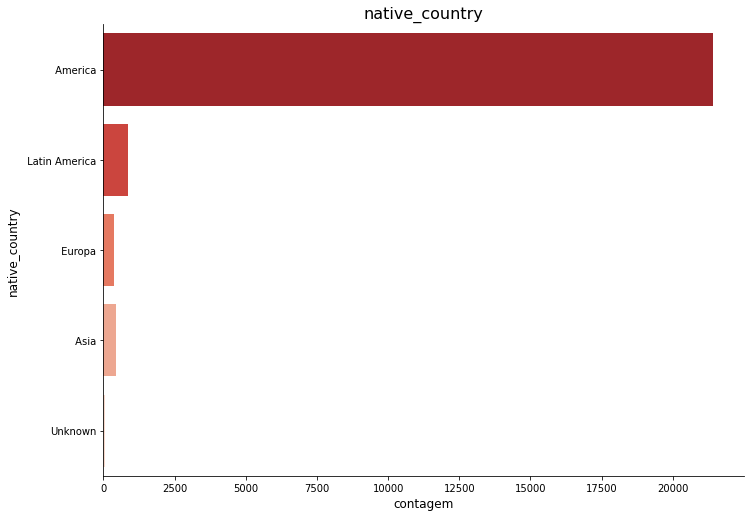

In [13]:
#visualizando os dados
nac_t = sns.catplot(y="native_country", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
nac_t.ax.set_title("native_country",fontdict={'size':16})
nac_t.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
nac_t.ax.yaxis.set_label_text("native_country",fontdict= {'size':12})
plt.show()

Conhecendo a classe dos dados

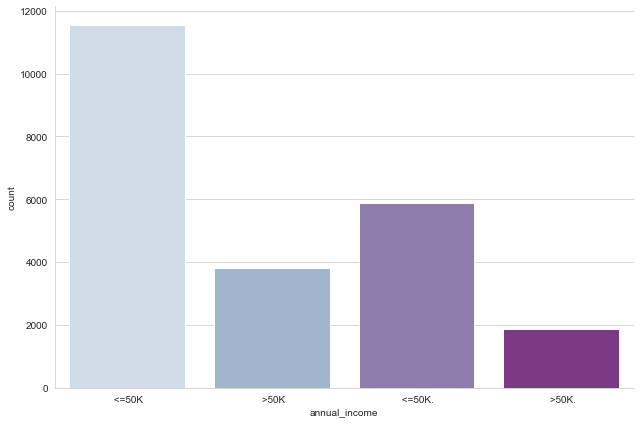

In [17]:
#Conferindo a classe para verificação. 
sns.set_style("whitegrid")
classe = sns.catplot(x="annual_income", data=df_f, kind="count", palette="BuPu", height=6, aspect=1.5)

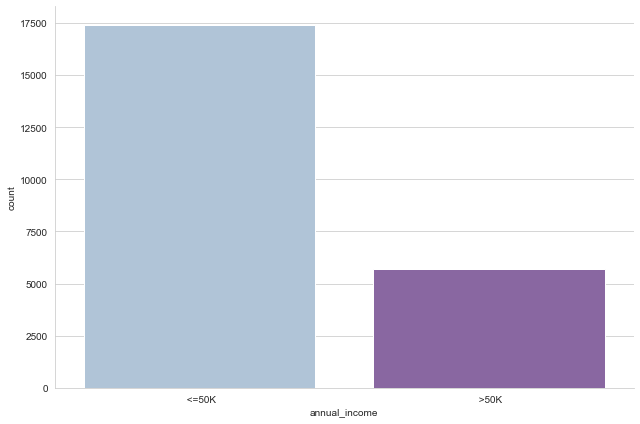

In [18]:
#há espaços em branco antes dos nomes. Vamos cuidá-los usando o método replace
df_f.replace(' <=50K.', ' <=50K', inplace=True)
df_f.replace(' >50K.', ' >50K', inplace=True)
df_f.annual_income.value_counts()

#plot da classe

classe = sns.catplot(x="annual_income", data=df_f, kind="count", palette="BuPu", height=6, aspect=1.5)

### Salvando o dataset tratado ate agora

In [19]:
df_f.to_csv('salary_f1.csv', index=False)

# Análise Exploratória dos Dados 

In [20]:
#carregando o dataset para construção do modelo preditivo
df_mp= pd.read_csv('salary_f1.csv')
df_mp.sample(2)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
20308,24,Private,275244,Some-college,10,Single,Exec-managerial,Not-in-family,Black,Male,no,no,35,America,<=50K
9973,32,Private,199529,Some-college,10,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,no,yes,40,America,<=50K


## Conhecendo os personas

In [22]:
#conhecendo os valores estatísticos dos dados
df_f.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,23124.000000,23124,2.312400e+04,23124,23124.000000,23124,23124,23124,23124,23124,23124,23124,23124.0000,23124,23124
unique,NaN,4,NaN,16,NaN,4,8,6,5,2,2,2,NaN,5,2
top,NaN,Private,NaN,HS-grad,NaN,Married,Sales,Husband,White,Male,no,no,NaN,America,<=50K
freq,NaN,20469,NaN,7968,NaN,10795,5356,9244,20099,15192,21205,22014,NaN,21422,17426
mean,38.000346,NaN,1.916713e+05,NaN,10.000389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3057,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN
25%,27.000000,NaN,1.204522e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0000,NaN,NaN
50%,36.000000,NaN,1.800600e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0000,NaN,NaN
75%,47.000000,NaN,2.377130e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0000,NaN,NaN


O nosso persona consinste em um homem branco, com 38 anos, vendedor, casado com rendimento anual abaixo ou igual a 50k.

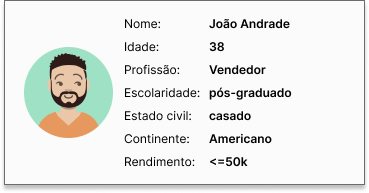

Quem são os demais personas do projeto?
utilizando o mesmo método describe, descobrimos os seguintes personas:

A mais nova:

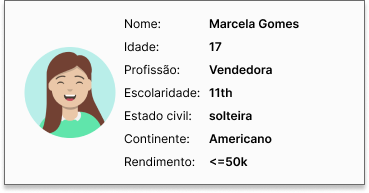 



O mais velho:
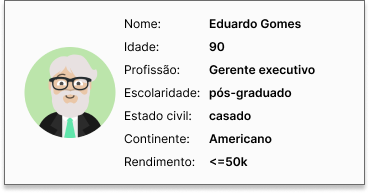

### E quem são as pessoas que ganham mais de 50k/ano?

Estas são as características das pessoas que ganham mais de 50k/ano:
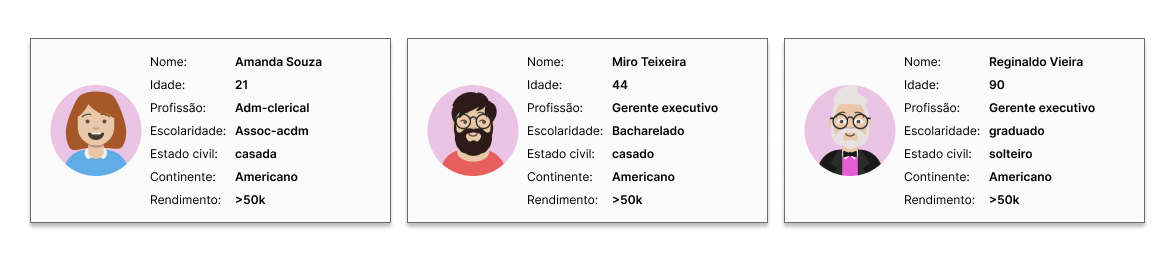

In [25]:
#Perfil dos mais velhos
df_idade3= df_f[df_f['age']==90]
df_idade3.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,22.0,22,22.000000,22,22.000000,22,22,22,22,22,22,22,22.000000,22,22
unique,NaN,2,NaN,9,NaN,4,6,5,2,2,2,2,NaN,2,2
top,NaN,Private,NaN,HS-grad,NaN,Married,Exec-managerial,Husband,White,Male,no,no,NaN,America,<=50K
freq,NaN,21,NaN,7,NaN,9,8,8,20,14,18,20,NaN,21,16
mean,90.0,NaN,163726.045455,NaN,9.954545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.227273,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,40388.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN
25%,90.0,NaN,85662.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,90.0,NaN,145413.500000,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,90.0,NaN,227589.000000,NaN,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.750000,NaN,NaN


In [27]:
df_upper = df_f[df_f['annual_income']== ' >50K']
df_upper.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,5698.000000,5698,5.698000e+03,5698,5698.000000,5698,5698,5698,5698,5698,5698,5698,5698.000000,5698,5698
unique,NaN,4,NaN,16,NaN,4,8,6,5,2,2,2,NaN,5,1
top,NaN,Private,NaN,Bachelors,NaN,Married,Exec-managerial,Husband,White,Male,no,no,NaN,America,>50K
freq,NaN,4564,NaN,1850,NaN,4937,2451,4378,5273,4880,4490,5110,NaN,5392,5698
mean,44.078624,NaN,1.889345e+05,NaN,11.250965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.403299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,21.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,36.000000,NaN,1.201310e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,43.000000,NaN,1.771470e+05,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,51.000000,NaN,2.314572e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN


In [28]:
df_upper1 = df_upper[df_upper['age']== 21]
df_upper1.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,3.0,3,3.000000,3,3.000000,3,3,3,3,3,3,3,3.0,3,3
unique,NaN,1,NaN,3,NaN,2,2,2,3,1,2,1,NaN,1,1
top,NaN,Private,NaN,Assoc-acdm,NaN,Married,Adm-clerical,Wife,Amer-Indian-Eskimo,Female,no,no,NaN,America,>50K
freq,NaN,3,NaN,1,NaN,2,2,2,1,3,2,3,NaN,3,3
mean,21.0,NaN,259331.666667,NaN,10.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,21.0,NaN,216070.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN
25%,21.0,NaN,221688.500000,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.5,NaN,NaN
50%,21.0,NaN,227307.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN
75%,21.0,NaN,280962.500000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.5,NaN,NaN


In [29]:
# perfil de quem idade maior
df_upper3 = df_upper[df_upper['age']== 90]
df_upper3.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,6.0,6,6.000000,6,6.000000,6,6,6,6,6,6,6,6.00,6,6
unique,NaN,1,NaN,4,NaN,2,3,3,2,2,2,2,NaN,2,1
top,NaN,Private,NaN,Bachelors,NaN,Single,Exec-managerial,Not-in-family,White,Male,no,no,NaN,America,>50K
freq,NaN,6,NaN,2,NaN,3,3,3,5,4,4,5,NaN,5,6
mean,90.0,NaN,126999.833333,NaN,12.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,46786.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,NaN,NaN
25%,90.0,NaN,61055.750000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN
50%,90.0,NaN,119030.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.50,NaN,NaN
75%,90.0,NaN,185477.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.75,NaN,NaN


### Quem são as mulheres do dataset?

Seguindo o mesmo raciocínio anterior, foi utilizado o método describe para descobrir o perfil das mulheres:

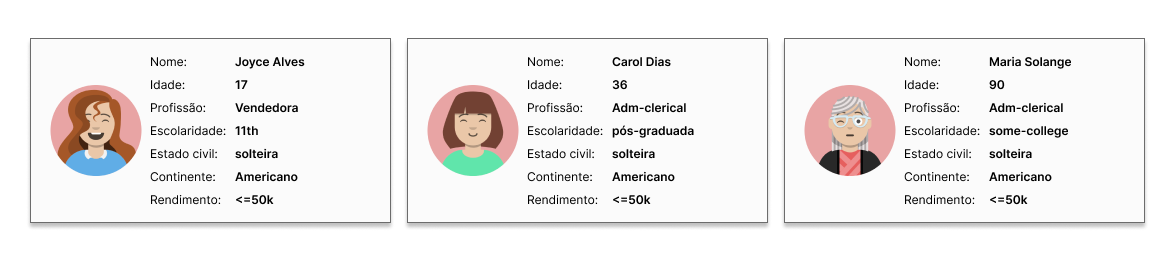
**Pergunta: Mulheres solteiras tendem a ser mais bem sucedidas?**

In [30]:
#isolando as mulheres no dataset:
df_fem = df_f[df_f['sex'] != " Male"]
df_fem.describe(include='all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,7932.000000,7932,7.932000e+03,7932,7932.000000,7932,7932,7932,7932,7932,7932,7932,7932.000000,7932,7932
unique,NaN,4,NaN,16,NaN,4,8,6,5,1,2,2,NaN,5,2
top,NaN,Private,NaN,HS-grad,NaN,Single,Adm-clerical,Not-in-family,White,Female,no,no,NaN,America,<=50K
freq,NaN,7513,NaN,2767,NaN,3607,2959,2855,6542,7932,7519,7669,NaN,7367,7114
mean,36.087746,NaN,1.891636e+05,NaN,9.930661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.309758,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.000000,NaN,1.939500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,25.000000,NaN,1.204522e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
50%,34.000000,NaN,1.777040e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,45.000000,NaN,2.309590e+05,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN


In [31]:
df_fem1=df_fem[df_fem['age']==17]
df_fem1.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,137.0,137,137.00000,137,137.000000,137,137,137,137,137,137,137,137.000000,137,137
unique,NaN,2,NaN,7,NaN,2,6,4,4,1,2,2,NaN,4,1
top,NaN,Private,NaN,11th,NaN,Single,Sales,Own-child,White,Female,no,no,NaN,America,<=50K
freq,NaN,135,NaN,76,NaN,136,104,122,127,137,133,136,NaN,133,137
mean,17.0,NaN,169672.79562,NaN,6.861314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.248175,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,17.0,NaN,23856.00000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
25%,17.0,NaN,110723.00000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN
50%,17.0,NaN,153021.00000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
75%,17.0,NaN,208967.00000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN


In [32]:
df_fem1=df_fem[df_fem['age']==90]
df_fem1.describe(include="all")

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
count,8.0,8,8.000,8,8.00,8,8,8,8,8,8,8,8.00,8,8
unique,NaN,1,NaN,5,NaN,4,3,4,2,1,1,2,NaN,2,2
top,NaN,Private,NaN,Some-college,NaN,Single,Adm-clerical,Own-child,White,Female,no,no,NaN,America,<=50K
freq,NaN,8,NaN,3,NaN,4,5,3,7,8,8,7,NaN,7,6
mean,90.0,NaN,189513.375,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,90.0,NaN,88991.000,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,NaN,NaN
25%,90.0,NaN,133571.500,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00,NaN,NaN
50%,90.0,NaN,156857.000,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN
75%,90.0,NaN,226647.000,NaN,10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN


## Plotando alguns gráficos...

Insights:
1. A nossa base de dados constitui em sua maioria homens, com idade média de 38 anos, brancos, casados, tem empregos privados, 

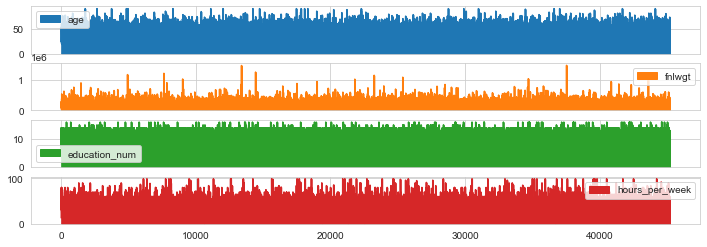

In [37]:
#visão geral dos dados numéricos
axs = df_f.plot.area(figsize=(12, 4), subplots=True)

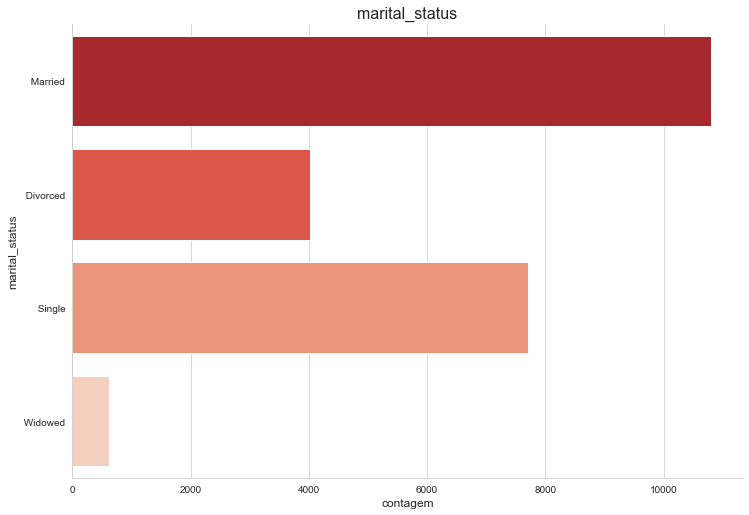

In [33]:
marital = sns.catplot(y="marital_status", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
marital.ax.set_title("marital_status",fontdict={'size':16})
marital.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
marital.ax.yaxis.set_label_text("marital_status",fontdict= {'size':12})
plt.show()

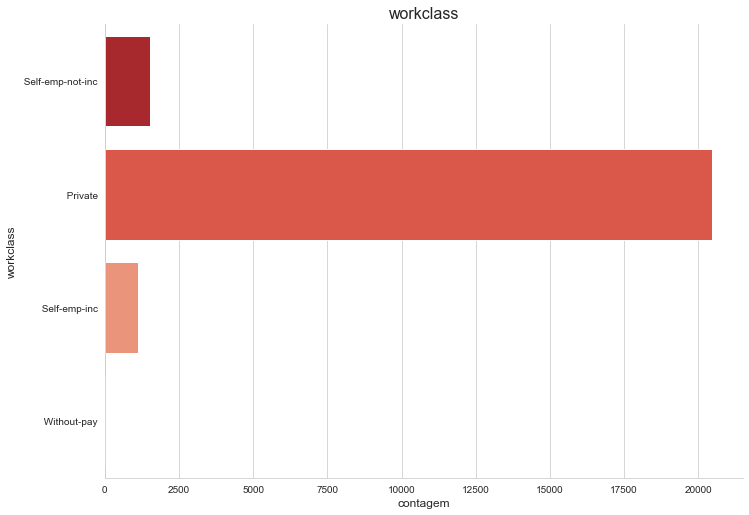

In [34]:
workclass = sns.catplot(y="work_class", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
workclass.ax.set_title("workclass",fontdict={'size':16})
workclass.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
workclass.ax.yaxis.set_label_text("workclass",fontdict= {'size':12})
plt.show()

#without-pay = desempregado

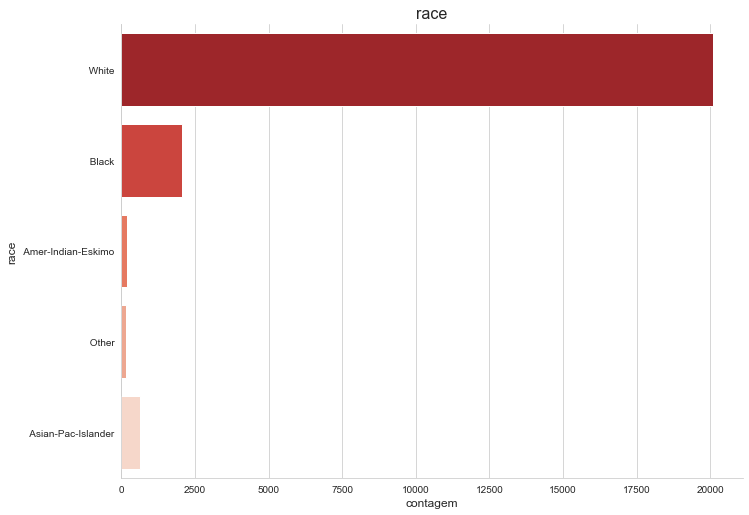

In [35]:
race = sns.catplot(y="race", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
race.ax.set_title("race",fontdict={'size':16})
race.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
race.ax.yaxis.set_label_text("race",fontdict= {'size':12})
plt.show()

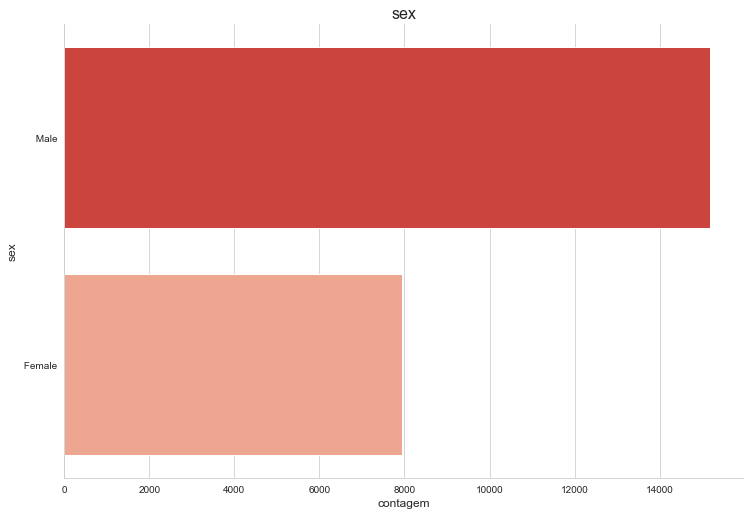

In [36]:
sex = sns.catplot(y="sex", data=df_f, kind="count", palette="Reds_r", height=7, aspect=1.5)
sex.ax.set_title("sex",fontdict={'size':16})
sex.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
sex.ax.yaxis.set_label_text("sex",fontdict= {'size':12})
plt.show()

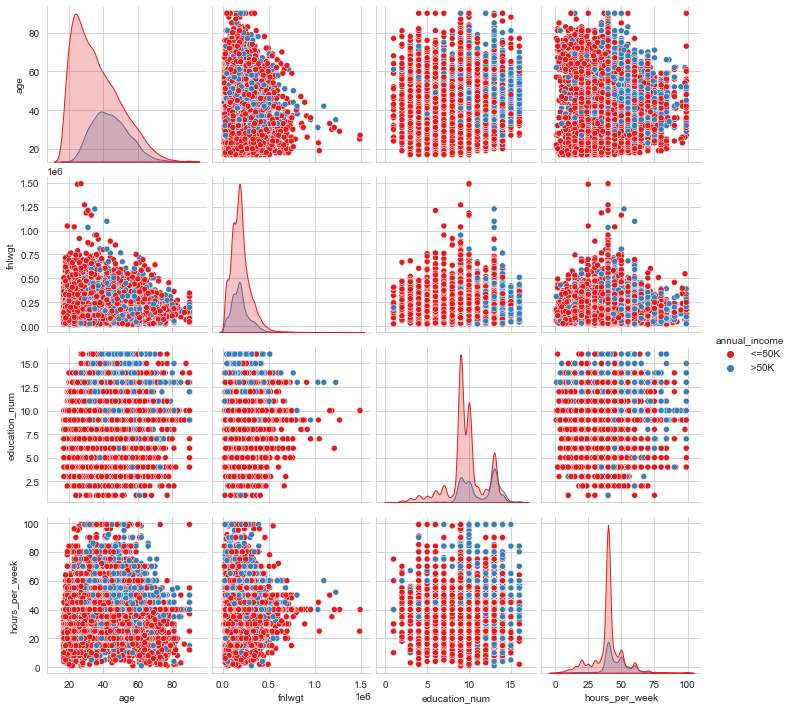

In [38]:
#Verificando os dados em correlação com o ganho anual:

sns.pairplot(df_f, hue='annual_income', palette='Set1')